# Задание
## Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
## Признаки:

- 1.satisfaction_level​ - Уровень удовлетворенности работой
- 2.Last_evaluation ​- Время с момента последней оценки в годах
- 3.number_projects​ - Количество проектов, выполненных за время работы
- 4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
- 5.time_spend_company​ - Стаж работы в компании в годах
- 6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
- 7.left​ - уволился ли сотрудник
- 8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет
- 9.department ​- отдел в котором работает сотрудник
- 10.salary​ - относительный уровень зарплаты

## Требуется выполнить следующее задание:

- Загрузите файл HR.csv в pandas dataframe 5
- Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).   10
- Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.   10
- Рассчитайте сколько сотрудников работает в каждомдепартаменте.   5
- Показать распределение сотрудников по зарплатам.    5
- Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности   5
- Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом  10
- Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):   10
                    ●Доля сотрудников с повышением за последние 5 лет
                    ●Средняя степень удовлетворенности
                    ●Среднее количество проектов
- Разделить данные на тестовую и обучающую выборки.Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).Оценить качество модели на тестовой выборки       20
- Загрузить jupyter notebook с решение на github и прислать ссылку       5

### 1.Загрузите файл HR.csv в pandas dataframe 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
hr = pd.read_csv('c:\\userpython\\hr.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2.Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)

In [9]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### 3.Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.

In [11]:
hr_1 = hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
hr_1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


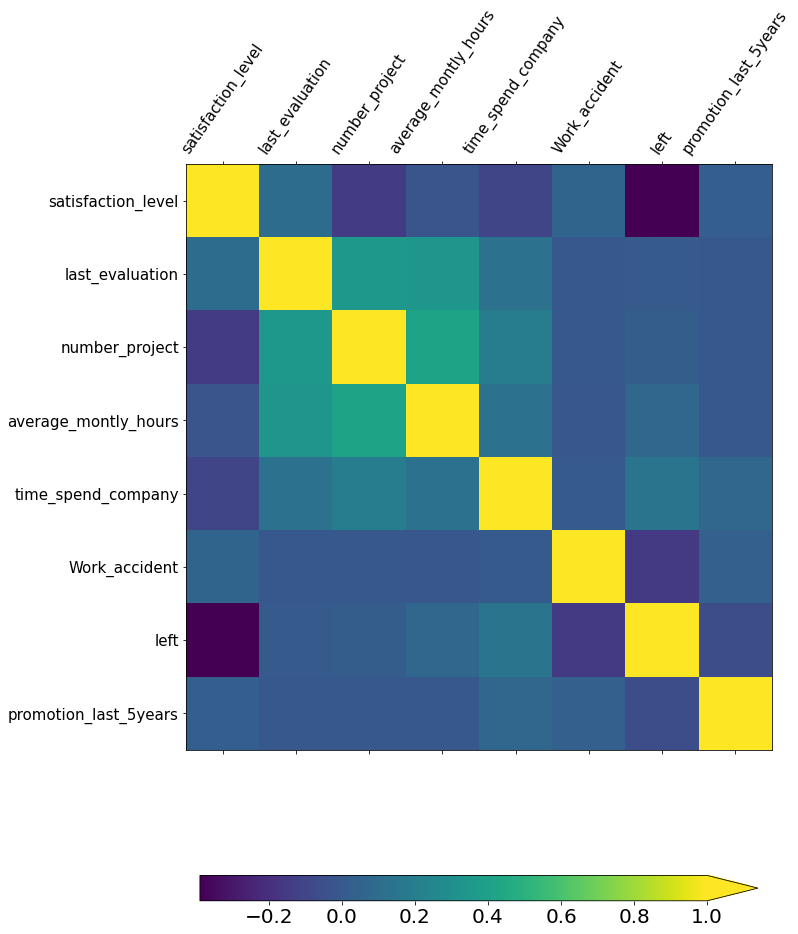

In [12]:
hr_figure = plt.figure(figsize=(20, 15))
plt.matshow(hr_1.corr(), fignum = hr_figure.number)
plt.xticks(range(hr_1.shape[1]), hr_1.columns, fontsize=15, rotation=55)
plt.yticks(range(hr_1.shape[1]), hr_1.columns, fontsize=15)
hr_color = plt.colorbar(orientation='horizontal', 
             shrink=0.5, extend='max', extendfrac=0.1, 
             extendrect=False, drawedges=False)
hr_color.ax.tick_params(labelsize=20)

### самые скоррелированные:
    average_montly_hours и number_project
    last_evaluation и number_project
### две наименеескоррелированные переменные:
    left и satisfaction_level
    left и Work_accident

### 4.Рассчитайте сколько сотрудников работает в каждомдепартаменте.

In [13]:
hr.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

### 5.Показать распределение сотрудников по зарплатам.

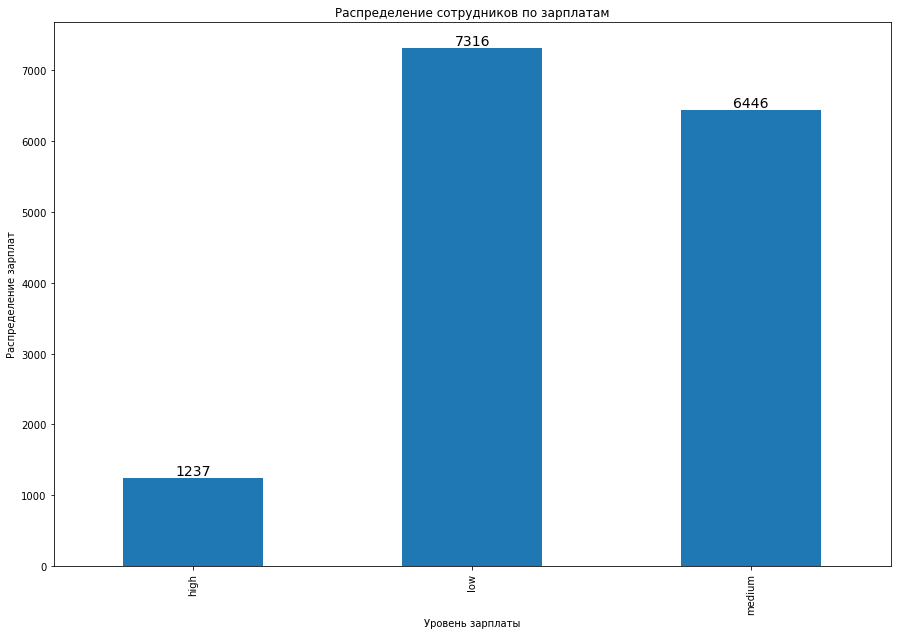

In [24]:
salary = hr.groupby('salary')['salary'].count()

salary.plot(kind = 'bar',figsize = (15,10),title='Распределение сотрудников по зарплатам',
                             xlabel='Уровень зарплаты',
                             ylabel='Распределение зарплат');
for i, val in enumerate(s.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

### 6.Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности 

In [30]:
hr_dep = hr.groupby([hr['department'],hr['salary']])[['salary']].count()

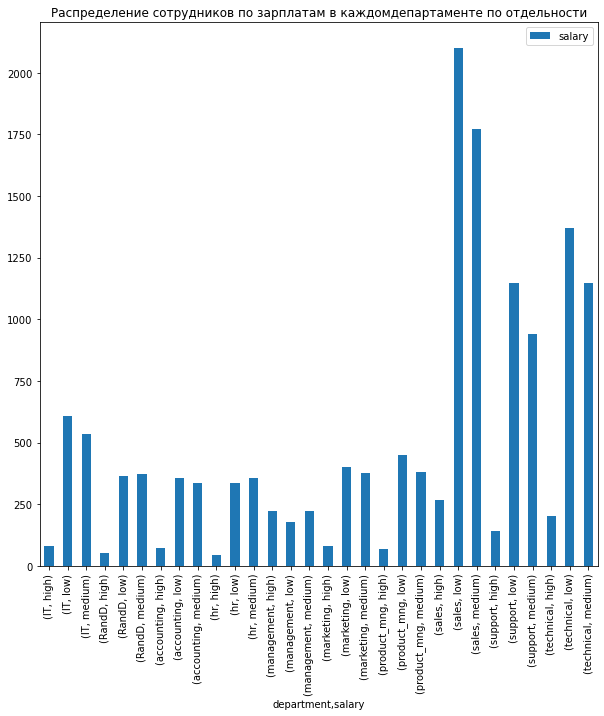

In [31]:
hr_dep.plot(kind="bar",title='Распределение сотрудников по зарплатам в каждомдепартаменте по отдельности',figsize=(10,10));

### 7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом 

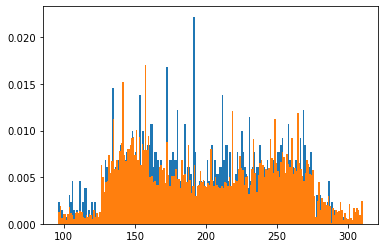

In [39]:
hr_high = list(hr.loc[hr['salary'] == 'high']['average_montly_hours'])
hr_low = list(hr.loc[hr['salary'] == 'low']['average_montly_hours'])
plt.hist(hr_high, bins=200, density=True);
plt.hist(hr_low, bins=200, density=True);

In [35]:
t, p = stats.ttest_ind(hr_high,hr_low)
t, p

(-0.7288680398062308, 0.4661023478267259)

In [ ]:
#Больше - , гипотеза не верна

### 8.Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности)
              Доля сотрудников с повышением за последние 5 лет
              Средняя степень удовлетворенности
              Среднее количество проектов

In [40]:
hr_left = hr.loc[hr['left'] == 1]
hr_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [42]:
len(hr_left.loc[hr_left['promotion_last_5years'] == 1])/len(hr_left)

0.005320638476617194

In [43]:
hr_left['satisfaction_level'].mean()

0.44009801176140917

In [44]:
hr_left['number_project'].mean()

3.8555026603192384

In [47]:
hr_work = hr.loc[hr['left'] == 0]
hr_work.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [48]:
len(hr_work.loc[hr_work['promotion_last_5years'] == 1])/len(hr_work)

0.026251312565628283

In [49]:
hr_work['satisfaction_level'].mean()

0.666809590479516

In [50]:
hr_work['number_project'].mean()

3.786664333216661

### 9.
### Разделить данные на тестовую и обучающую выборки
### Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) 
### Оценить качество модели на тестовой выборки 

In [85]:
hr_lda = hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
left = pd.array(hr_lda['left'])

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hr_lda[['satisfaction_level','last_evaluation','number_project',
                                                            'average_montly_hours','time_spend_company','Work_accident',
                                                            'promotion_last_5years']], left, test_size=0.30)

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [88]:
lda = LinearDiscriminantAnalysis()

In [89]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [90]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
4495,1,0
4496,0,0
4497,0,0
4498,0,0


In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7604444444444445